# Predecticting diabetes

## Import statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do plotting inline instead of new window
%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv('./data/pima-diabetes/pima-data.csv')
df.shape

(768, 10)

In [3]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## check for NULL values

In [4]:
df.isnull().values.any()

False

In [5]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [6]:
def plot_corr(df, size = 11):
    """
    Inputs:
        df: pandas datafrasme
        size: vertical and horizontal size of the plot
    Displays:
        matrix of corelation between columns: Blue, cyan, yellow, red, dark-red - less to more corelated
                                                0--------------------------->1
    """
    corr = df.corr() # dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles with correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks

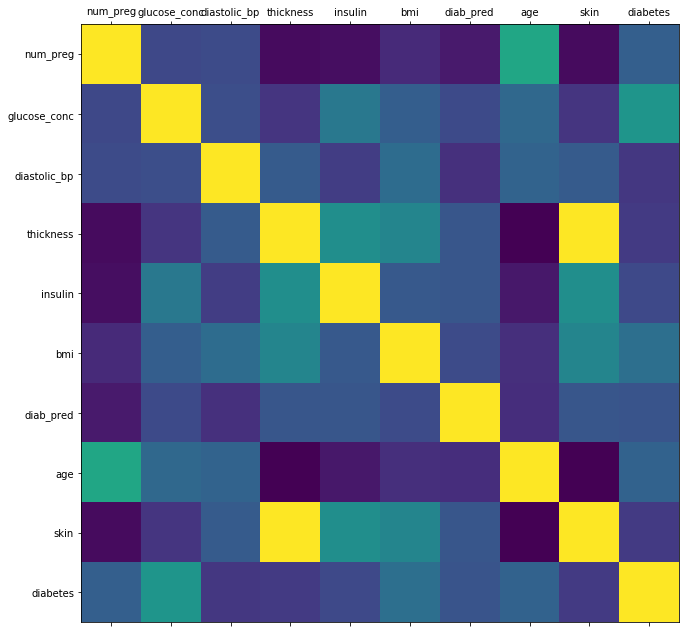

In [7]:
plot_corr(df)

In [8]:
# since skin and thickness are very closely related... we can either make note of this or remove one
del df['skin']


In [9]:
df.head(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


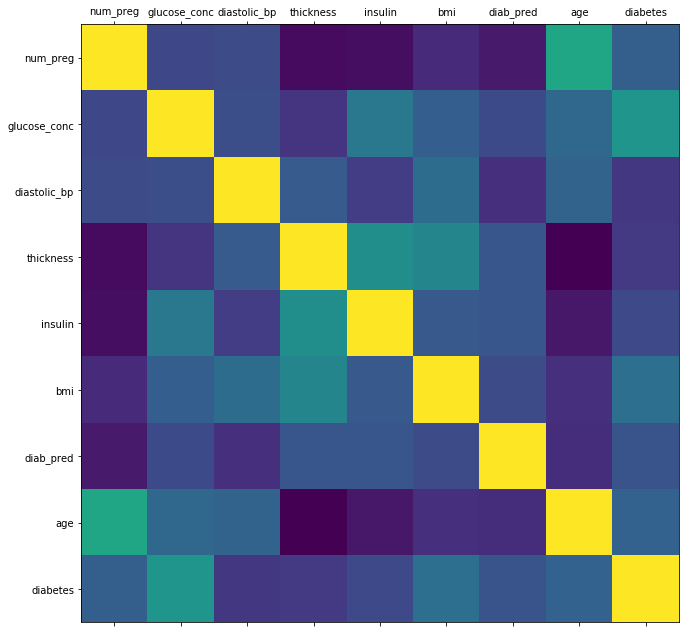

In [10]:
plot_corr(df)


## Check data types

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [12]:
# algorithms require all the features and classification results should be numerical

converting True-> 1, False -> 0


In [13]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check True/False percentages

In [15]:
n_true = len(df.loc[df['diabetes'] == True])
n_false = len(df.loc[df['diabetes'] == False])

perc_true = ((n_true * 1.0)/(n_true + n_false)) * 100
perc_false = ((n_false * 1.0)/(n_true + n_false)) * 100

print 'True {0} : {1: 2.2f}%'.format(n_true, perc_true)
print 'False {0} : {1: 2.2f}%'.format(n_false, perc_false)

True 268 :  34.90%
False 500 :  65.10%


# Navive Bayes Algorithm
## Splitting the data
70% training the model, 30% testing

In [39]:
from sklearn.cross_validation import train_test_split

feature_col_names = [ 'num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
prediction_class_name = ['diabetes']

x = df[feature_col_names].values
y = df[prediction_class_name].values

# print type(x)
print x

split_test_size = 0.30
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = split_test_size, random_state=42)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


Check to ensure that data is split

In [17]:
print '{0: 0.2f}% : training set'.format((len(X_train) * 1.0) /len(df.index) * 100)
print '{0: 0.2f}% : test set'.format((len(X_test) * 1.0) /len(df.index) * 100)

 69.92% : training set
 30.08% : test set


#### Verify if data is split correctly
While stats mentioned above show us that data is split fine, we also need to make sure that percentage of *True* and *False* is same in both test and train data

In [18]:
total_rows = len(df.index)
total_true = len(df.loc[df['diabetes'] == 1])
total_false = len(df.loc[df['diabetes'] == 0])

print 'Original True : [{0}({1: 0.2f}%)]'.format(total_true, (total_true * 1.0/total_rows * 100))
print 'Original False : [{0}({1: 0.2f}%)]'.format(total_false, (total_false * 1.0/total_rows * 100))
print ""

train_all = len(Y_train)
train_true = len(Y_train[Y_train[:] == 1])
train_false = len(Y_train[Y_train[:] == 0])

print 'Training True : [{0}({1: 0.2f}%)]'.format(train_true, (train_true * 1.0/train_all * 100))
print 'Training False : [{0}({1: 0.2f}%)]'.format(train_false, (train_false * 1.0/train_all * 100))
print ""

test_all = len(Y_test)
test_true = len(Y_test[Y_test[:] == 1])
test_false = len(Y_test[Y_test[:] == 0])

print 'Testing True : [{0}({1: 0.2f}%)]'.format(test_true, (test_true * 1.0/test_all * 100))
print 'Testing False : [{0}({1: 0.2f}%)]'.format(test_false, (test_false * 1.0/test_all * 100))
print ""


Original True : [268( 34.90%)]
Original False : [500( 65.10%)]

Training True : [188( 35.01%)]
Training False : [349( 64.99%)]

Testing True : [80( 34.63%)]
Testing False : [151( 65.37%)]



### Post data split preparation

#### Hidden missing values

In [19]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


thickness = 0  in row 3, thickness 0 is not possible
#### Checkin for other rows with zero values

In [20]:
print 'rows in data frame: {}'.format(len(df))
print 'rows missing glucose_conc: {}'.format(len(df.loc[df['glucose_conc'] == 0]))
print 'rows missing diastolic_bp: {}'.format(len(df.loc[df['diastolic_bp'] == 0]))
print 'rows missing thickness: {}'.format(len(df.loc[df['thickness'] == 0]))
print 'rows missing insulin: {}'.format(len(df.loc[df['insulin'] == 0]))
print 'rows missing bmi: {}'.format(len(df.loc[df['bmi'] == 0]))
print 'rows missing diab_pred: {}'.format(len(df.loc[df['diab_pred'] == 0]))
print 'rows missing age: {}'.format(len(df.loc[df['age'] == 0]))


rows in data frame: 768
rows missing glucose_conc: 5
rows missing diastolic_bp: 35
rows missing thickness: 227
rows missing insulin: 374
rows missing bmi: 11
rows missing diab_pred: 0
rows missing age: 0


#### Imputing with the mean

In [21]:
from sklearn.preprocessing import Imputer
fill_0 = Imputer(missing_values = 0, strategy="mean", axis = 0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Train intial algorithm: Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train.ravel())


GaussianNB(priors=None)

## Performance on training data

In [23]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train))

Accuracy:  0.7542


## Performance on test data

In [24]:
nb_predict_test = nb_model.predict(X_test)

# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test))

Accuracy:  0.7359


When ever there is such a big drop in performance in **training** and **test** data.  

This is classic example of an algorithm  **overfitting** data that means that algorithm has learnt the training data too well.
### Metrics

In [25]:
print "Confusion matrix"
print "{}".format(metrics.confusion_matrix(Y_test, nb_predict_test))

print ""

print "Classification report"
print metrics.classification_report(Y_test, nb_predict_test)

Confusion matrix
[[118  33]
 [ 28  52]]

Classification report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



#### Confusion matrix
TN FP   
FN TP  
  
 
TN - True Negative &nbsp;&nbsp;&nbsp;&nbsp;       : &nbsp;&nbsp;&nbsp; * actually **not diabetes** and predicted to be **not diabetes** *  
FP - False Positive &nbsp;&nbsp;&nbsp;&nbsp;      : &nbsp;&nbsp;&nbsp; * actually **not diabetes** but predicted **diabetes** *  
FN - False Negative &nbsp;&nbsp;&nbsp;            : &nbsp;&nbsp;&nbsp;  * **actually diabetes** but shown **not diabetes** *  
TP - True Positive &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; : &nbsp;&nbsp;&nbsp; * **actually diabetes** and shown **diabetes** *  

##### Perfect Classifier
According to this, a "Perfect" classifier would be :  
151 &nbsp;&nbsp;  0  
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   80  
  
Since our test report earlier stated:  
Testing True : &nbsp;[80 &nbsp;&nbsp;&nbsp;&nbsp;   ( &nbsp;&nbsp; 34.63%&nbsp;&nbsp;)&nbsp;]  
Testing False : [151 &nbsp; ( &nbsp;&nbsp; 65.37%&nbsp;&nbsp;)&nbsp;]  

In [26]:
print metrics.classification_report(Y_test, nb_predict_test)

             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



Our result is far from perfect. But is it good enough?  
Classfication report generates statistics based on values shown in confusionMatrix().  
  
Based on our porblem statement we want to know if a patient has the disease to be 70% or higher.  
This is the recall for class **1** or diabetes. (in report)  
  
###### Recall
Recall is also known as true positive rate and sensitivity.  
It is how well the model is predicting diabetes when the result is actually diabetes.  
  
  
Mathematically:
    
    recall = TP / (TP + FN)
    

Current rate is 0.65 or 65%, we need this number to be higher than 70%.

###### Precision
Precesion is also known as a positive predictor value.  
This is how often the patient actually had diabetes, when the model said they would.  
  
  
Mathematically:
    
    precision = TP / (TP + FP)
    
We would also like this number to be higher since that would mean *fewer false positives*.


# New algorithm : Random forest

Random forest is an ensemble algorithm,  
It's based on decision trees, it creates multiple trees(hence forest) with random subsets of data.  
  
  
Results of these trees are averaged, this usually results in imporved performance and can reduce the tree algorithms tendencies of overfitting




In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict training data

In [28]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_train, rf_predict_train))

Accuracy:  0.9870


### Predict test data

In [29]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_test, rf_predict_test))

Accuracy:  0.7100


### Metrics

In [30]:
print "Confusion matrix"
print "{}".format(metrics.confusion_matrix(Y_test, rf_predict_test))

print ""

print "Classification report"
print metrics.classification_report(Y_test, rf_predict_test)

Confusion matrix
[[121  30]
 [ 37  43]]

Classification report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



# New algorithm: Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C= 0.7, random_state = 42)
lr_model.fit(X_train, Y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print ""

# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test))

print ""

print "Confusion matrix"
print "{}".format(metrics.confusion_matrix(Y_test, lr_predict_test))

print ""

print "Classification report"
print metrics.classification_report(Y_test, lr_predict_test)


Accuracy:  0.7446

Confusion matrix
[[128  23]
 [ 36  44]]

Classification report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



#### Setting regularization parameters

1st max value of  0.613 occured at C =  1.400


Text(0,0.5,u'recall score')

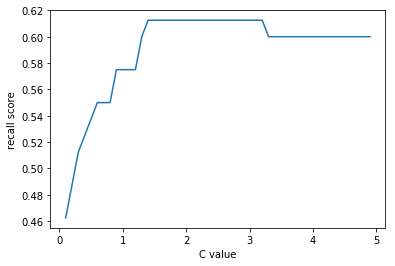

In [32]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores= [], []
best_recall_score = 0
best_lr_predict_test = None
for C_val in np.arange(C_start, C_end, C_inc):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val, random_state = 42)
    lr_model_loop.fit(X_train, Y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(best_recall_score < recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print "1st max value of {: 0.3f} occured at C = {: 0.3f}".format(best_recall_score, best_score_C_val)

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### With class weight balanced

1st max value of  0.738 occured at C =  0.300


Text(0,0.5,u'recall score')

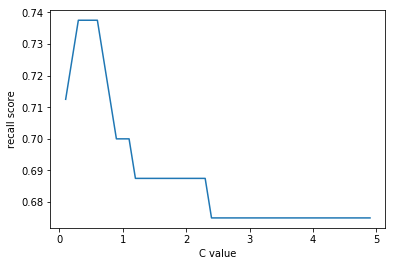

In [33]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores= [], []
best_recall_score = 0
best_lr_predict_test = None
for C_val in np.arange(C_start, C_end, C_inc):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val, class_weight="balanced", random_state = 42)
    lr_model_loop.fit(X_train, Y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(best_recall_score < recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print "1st max value of {: 0.3f} occured at C = {: 0.3f}".format(best_recall_score, best_score_C_val)

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [34]:
lr_model = LogisticRegression(C= best_score_C_val, class_weight="balanced", random_state = 42)
lr_model.fit(X_train, Y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print ""

# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test))

print ""

print "Confusion matrix"
print "{}".format(metrics.confusion_matrix(Y_test, lr_predict_test))

print ""

print "Classification report"
print metrics.classification_report(Y_test, lr_predict_test)


Accuracy:  0.7143

Confusion matrix
[[106  45]
 [ 21  59]]

Classification report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



## LogisticRegressionCV

In [35]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs =-1, random_state = 42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, Y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

### Predict on test data

In [36]:
print ""

# training metrics
print  "Accuracy: {0: 0.4f}".format(metrics.accuracy_score(Y_test, lr_cv_predict_test))

print ""

print "Confusion matrix"
print "{}".format(metrics.confusion_matrix(Y_test, lr_cv_predict_test))

print ""

print "Classification report"
print metrics.classification_report(Y_test, lr_cv_predict_test)


Accuracy:  0.7013

Confusion matrix
[[109  42]
 [ 27  53]]

Classification report
             precision    recall  f1-score   support

          0       0.80      0.72      0.76       151
          1       0.56      0.66      0.61        80

avg / total       0.72      0.70      0.71       231



This recall is not near what we achieved while tuning our model to test data... but this will be closer to data in real world